# <font color='red'> Project: Coffee Point Data Analysis Using Python </font>
## <font color='green'> Topic: Developing ABC and FRM analysis for Coffee Point and data integration in Python </font>

### <font color='blue'> 1. Data Preparation

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
import os
import warnings
warnings.filterwarnings('ignore')

In [64]:
# Simulate data
products = ["Coffee", "Espresso", "Latte", "Cappuccino", "Mocha", "Tea", "Sandwich", "Cake"]
customers = [f"CUST-{i:03d}" for i in range(1, 1001)]
data = []
# Define start date and months
start_date = datetime(2024, 1, 1)
for month in range(1, 13):  # Loop through each month
    for _ in range(random.randint(300,800)):
        order_id = f"ORD-{len(data)+1:03d}"
        item = random.choice(products)
        # Generate random day within the current month
        first_day = datetime(2024, month, 1)
        last_day = (first_day + timedelta(days=32)).replace(day=1) - timedelta(days=1)
        random_date = first_day + timedelta(days=random.randint(0, (last_day - first_day).days))
        price = round(random.uniform(2, 20), 2)  # Random price between $2 and $20
        customer = random.choice(customers)
        data.append([order_id, item, random_date.strftime('%Y-%m-%d'), price, customer])
# Create a DataFrame and save to CSV
df = pd.DataFrame(data, columns=["key", "item", "date", "price", "customer"])
df.to_csv("C:/Users/Zenbook14/Python Programing/coffee_point_data.csv", index=False)
print("Sample Data Created.")

Sample Data Created.


### <font color='blue'> 2. ABC Analysis

In [66]:
# Calculate Total Sales per Product
def abc_analysis(df):
  sales_per_product = df.groupby("item")["price"].sum().sort_values(ascending=False)
  # Calculate cumulative percentage
  total_sales = sales_per_product.sum()
  sales_cumulative = (sales_per_product/total_sales).cumsum()
  # Categorize into A, B, C
  abc_categories = pd.cut(sales_cumulative,bins=[0, 0.8, 0.95, 1], labels = ['A','B','C'])
  sales_per_product = sales_per_product.reset_index()
  sales_per_product["ABC"] = abc_categories.values
  return sales_per_product
abc_results = abc_analysis(df)
print(abc_results)

         item    price ABC
0         Tea  9949.01   A
1       Mocha  9614.16   A
2        Cake  9368.57   A
3       Latte  9223.43   A
4    Espresso  9113.76   A
5    Sandwich  9046.43   A
6  Cappuccino  8721.98   B
7      Coffee  8564.76   C


### <font color='blue'> 3. FRM Analysis

In [68]:
# Calculate Frequency, Recency, Monetary
# FRM Analysis
def frm_analysis(df):
    df["date"] = pd.to_datetime(df["date"])
    current_date = df["date"].max() + pd.Timedelta(days=1)
    frm = df.groupby("customer").agg(
        Frequency=("key", "count"),
        Recency=("date", lambda x: (current_date - x.max()).days),
        Monetary=("price", "sum"),)
    # Add thresholds for segmentation
    recency_threshold = frm["Recency"].astype(int).median()
    frequency_threshold = frm["Frequency"].median()
    monetary_threshold = frm["Monetary"].median()
    # Create segments
    frm['Segment'] = (
        frm.apply(lambda row: 'High Value' if row['Frequency'] > frequency_threshold and row['Monetary'] > monetary_threshold
                          else ('Loyal' if row['Frequency'] > frequency_threshold 
                                else ('At Risk' if row['Recency'] > recency_threshold else 'Low Value')), axis=1))
    return frm
frm_results = frm_analysis(df)
print(frm_results)

          Frequency  Recency  Monetary     Segment
customer                                          
CUST-001          2      260     12.04     At Risk
CUST-002         12       38    132.66  High Value
CUST-003         10       41     83.17  High Value
CUST-004          8       71     87.19  High Value
CUST-005          6       12     74.46   Low Value
...             ...      ...       ...         ...
CUST-995          5      115     41.09     At Risk
CUST-996          4      104     53.72     At Risk
CUST-997          4       27     38.46   Low Value
CUST-998          7       19     84.97   Low Value
CUST-999          5       16     50.08   Low Value

[998 rows x 4 columns]


### <font color='blue'> 4. Visualization

#### <font color='orange'> 4.1. ABC Analysis Visualization

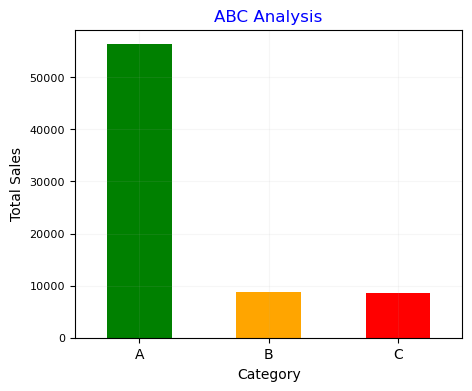

In [71]:
def visualize_abc(abc_results):
  plt.figure(figsize=(5,4))
  abc_results.groupby("ABC")["price"].sum().plot(kind='bar',color=["green","orange","red"])
  plt.title("ABC Analysis",color='blue')
  plt.xlabel("Category")
  plt.xticks(rotation = 0)
  plt.ylabel("Total Sales")
  plt.yticks(size=8)
  plt.grid(alpha =0.1)
  plt.show()
visualize_abc(abc_results)

#### <font color='orange'> 4.2. FRM Distribution

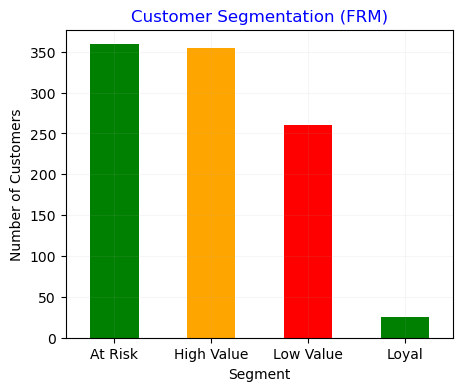

In [73]:
def visualize_frm(frm_results):
    plt.figure(figsize=(5, 4))
    frm_results["Segment"].value_counts().plot(kind="bar", color=["green","orange","red"])
    plt.title("Customer Segmentation (FRM)",color='blue')
    plt.xlabel("Segment")
    plt.xticks(rotation = 0)
    plt.ylabel("Number of Customers")
    plt.grid(alpha=0.1)
    plt.show()
visualize_frm(frm_results)

### <font color='blue'> 5. Automation and Application Development

#### <font color='orange'> 5.1. Automation with Python Scripts

**Add Scheduling Support**

In [77]:
# output_dir = "C:/Users/Zenbook14/Python Programing/"
# data_path = "C:/Users/Zenbook14/Python Programing/coffee_point_data.csv"
# def process_data(data_path,output_dir):
#   if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
#   # Load data
#   df = pd.read_csv(data_path)
#   # Perform ABC Analysis
#   abc_results = abc_analysis(df)
#   abc_results.to_csv(os.path.join(output_dir,"abc_results.csv"),index=False)
#   # Perform FRM Analysis
#   frm_results = frm_analysis(df)
#   frm_results.to_csv(os.path.join(output_dir, "frm_results.csv"), index=False)
#   # Save visualizations
#   visualize_abc(abc_results,os.path.join(output_dir,"abc_chart.png"))
#   visualize_frm(frm_results,os.path.join(output_dir,"frm_chart.png"))
#   print(f"Data processed and results saved to {output_dir}")

**Automate Data Processing**

In [79]:
%%writefile analysis_tools.py
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# ABC Analysis
def abc_analysis(df):
    sales_per_product = df.groupby("item")["price"].sum().sort_values(ascending=False)
    total_sales = sales_per_product.sum()
    sales_cumulative = (sales_per_product / total_sales).cumsum()
    abc_categories = pd.cut(sales_cumulative, bins=[0, 0.8, 0.95, 1], labels=["A", "B", "C"])
    sales_per_product = sales_per_product.reset_index()
    sales_per_product["ABC"] = abc_categories.values
    return sales_per_product

# FRM Analysis
def frm_analysis(df):
    df["date"] = pd.to_datetime(df["date"])
    current_date = df["date"].max() + pd.Timedelta(days=1)
    frm = df.groupby("customer").agg(
        Frequency=("key", "count"),
        Recency=("date", lambda x: (current_date - x.max()).days),
        Monetary=("price", "sum"),)
    # Add thresholds for segmentation
    recency_threshold = frm["Recency"].astype(int).median()
    frequency_threshold = frm["Frequency"].median()
    monetary_threshold = frm["Monetary"].median()
    # Create segments
    frm['Segment'] = (frm.apply(lambda row: 'High Value' if row['Frequency'] > frequency_threshold and row['Monetary'] > monetary_threshold
                          else ('Loyal' if row['Frequency'] > frequency_threshold 
                                else ('At Risk' if row['Recency'] > recency_threshold else 'Low Value')), axis=1))
    return frm

# Visualize ABC Analysis
def visualize_abc(abc_results, output_path):
    plt.figure(figsize=(5, 4))
    abc_results.groupby("ABC")["price"].sum().plot(kind="bar", color=["green", "orange", "red"])
    plt.title("ABC Analysis", color="blue")
    plt.xlabel("Category")
    plt.xticks(rotation=0)
    plt.ylabel("Total Sales")
    plt.yticks(size=6)
    plt.grid(alpha=0.1)
    plt.savefig(output_path)
    plt.close()

# Visualize FRM Analysis
def visualize_frm(frm_results, output_path):
    plt.figure(figsize=(5, 4))
    frm_results["Segment"].value_counts().plot(kind="bar", color=['#3498db', '#2ecc71', '#f1c40f', '#e74c3c'])
    plt.title("Customer Segmentation (FRM)", color="blue")
    plt.xlabel("Segment")
    plt.xticks(rotation=0)
    plt.ylabel("Number of Customers")
    plt.grid(alpha=0.1)
    plt.savefig(output_path)
    plt.close()
    
# Interactive 3D FRM Plot ="frm_3d_plot_with_segments.html"
# Function for 3D FRM Plot with Segments
def frm_3d_scatter_with_segments(frm_results):
    if "Segment" not in frm_results.columns:
        st.error("The FRM data must contain a 'Segment' column for visualization.")
        return None
    # Create the 3D scatter plot
    fig = px.scatter_3d(frm_results.reset_index(),x="Recency", y="Frequency", z="Monetary", color="Segment", symbol="Segment", hover_name="customer",
         color_discrete_map={"High Value": "#2ecc71", "Loyal": "#3498db", "At Risk": "#e74c3c", "Low Value": "#f1c40f"})
    fig.update_traces(marker=dict(size=3, opacity=0.5))
    fig.update_layout(scene=dict(xaxis_title="Recency (Days)", yaxis_title="Frequency", zaxis_title="Monetary ($)"))
    return fig

Overwriting analysis_tools.py


#### <font color='orange'> 5.2 Design the Streamlit App

In [111]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from analysis_tools import abc_analysis, frm_analysis, visualize_abc, visualize_frm, frm_3d_scatter_with_segments
from io import StringIO
import plotly.express as px
import os

# Page configuration
st.set_page_config(page_title="Advanced Coffee Point Analysis", layout="wide", page_icon=":coffee:")

# Custom CSS
st.markdown("""
    <style>
        .custom-title {
            font-family: 'Arial', sans-serif;
            color: green;
            font-size: 34px;
            text-align: center;
            font-weight: bold;
        }
        [data-testid="stSidebar"] {
            background-image: url("https://images.unsplash.com/photo-1690983325598-dd23fcf8f835?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8M3x8Y29mZmVlJTIwdG9wJTIwdmlld3xlbnwwfHwwfHx8MA%3D%3D");
            background-size: cover;
            background-repeat: no-repeat;
            background-position: center;
            color: white;
        } 
        .main {
        background-color: white;
        background-size: cover;
        background-position: center; 
        }
    </style>""", unsafe_allow_html=True)

# Title and Introduction - Only shown initially
st.markdown(":green[Coffee Point Analysis Application]")
st.components.v1.html(""" <script>
    var decoration = window.parent.document.querySelectorAll('[data-testid="stDecoration"]')[0];
    var sidebar = window.parent.document.querySelectorAll('[data-testid="stSidebar"]')[0];
    function outputsize() {
        decoration.style.left = `${sidebar.offsetWidth}px`;
    }
    new ResizeObserver(outputsize).observe(sidebar);
    outputsize();
    decoration.style.height = "3.0rem";
    decoration.style.right = "45px";
    decoration.style.backgroundImage = "url(https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZp73jURGSAYeFbobOinuGO58tQcQ0SEKwUg&s)";
    decoration.style.backgroundSize = "contain";
    </script> """, width=0, height=0)
# Sidebar Navigation
st.sidebar.header(":coffee: :blue[Navigation]")
menu = st.sidebar.radio("Go to", ["Topic", "Instruction", "Overview", "ABC Analysis", "FRM Analysis", "Insights","Conclusion"])

# File uploader
st.sidebar.subheader("Upload Your Data")
uploaded_file = st.sidebar.file_uploader(":red[Upload your CSV file]", type=["csv"])

# Ensure output directory exists
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# Topic session
if menu == "Topic":
    # st.header(":star: Topic")
    st.subheader(":blue[Welcome to the] :red[Coffee Point Analysis Application].")     
    st.subheader(":blue[This tool allows you to:]")
    st.subheader(" :balloon: :blue[Analyze sales data using] :red[ABC Analysis] :blue[to identify key revenue-generating products.]  ")
    st.subheader(" :balloon: :blue[Segment customers using] :red[FRM Analysis] :blue[for targeted marketing strategies.]  ")
    st.subheader(" :balloon: :blue[Explore detailed insights into sales trends and customer behavior.]")
    st.header(" :rainbow[Upload your data and start exploring!]")
    
    def set_background(image_url):
        st.markdown(f"""
            <style>
            .stApp {{
                background-image: url("{image_url}");
                background-size: 136% auto;
                background-position: right;
                background-repeat: no-repeat;
                background-attachment: fixed;
            }}
            .main {{
                background-color: rgba(255, 255, 255, 0.8);  # Adds a semi-transparent white overlay
            }}
            </style>""", unsafe_allow_html=True)
    # Call the function with your image URL
    set_background('https://coffeepoint.ae/wp-content/uploads/2022/08/image133.jpg')
    
# Instruction Section
if menu == "Instruction":
    st.header(":book: :blue[Instruction]")
    st.markdown("""
        **How to Use This Application**:
        1. Go to the **Overview** section to upload your CSV file.
        2. Explore:
            - **:red[ABC Analysis]** for identifying top products.
            - **:red[FRM Analysis]** for customer segmentation.
            - **:red[Insights]** for trends and deeper analysis.
        3. Navigate between sections using the sidebar.
        
        **CSV File Format**:
        - Ensure your file has the following columns:
            - `key`: Unique order identifier.
            - `item`: Product name.
            - `date`: Order date in `YYYY-MM-DD` format.
            - `price`: Price of the product.
            - `customer`: Customer ID.
    """)

# Home Section
if menu == "Overview":
    st.header(":coffee: :blue[Upload and View Data]")
    if uploaded_file:
        df = pd.read_csv(uploaded_file)
        col1, col2, col3= st.columns([3.8,2,3.4])
        with col1:
            st.write("Dataset Preview")
            st.dataframe(df,hide_index =True)
        with col2:
            st.write("Statistical Summary")
            st.dataframe(df.describe())
        with col3:
            st.write("Quick Info")
            buffer = StringIO()
            df.info(buf=buffer)
            st.text(buffer.getvalue())
    else:
        st.warning("Please upload a CSV file.")

# ABC Analysis Section
if menu == "ABC Analysis":
    st.header(":chart_with_upwards_trend: :blue[ABC Analysis]")
    if uploaded_file:
        df = pd.read_csv(uploaded_file)
        abc_results = abc_analysis(df)
        col1, col2 = st.columns([1.5, 2])
        with col1:
            st.write("ABC Analysis Table")
            st.dataframe(abc_results)
        with col2:
            abc_chart_path = os.path.join(output_dir, "abc_chart.png")
            visualize_abc(abc_results, abc_chart_path)
            st.image(abc_chart_path, caption="ABC Analysis Chart", use_column_width=True)

        st.subheader(":red[Key Insights]")
        total_sales = df["price"].sum()
        category_summary = abc_results.groupby("ABC")["price"].sum()
        for cat, value in category_summary.items():
            st.write(f"- Category {cat}: ${value:.2f} ({(value/total_sales)*100:.2f}%)")
    else:
        st.warning("Please upload a CSV file.")

# FRM Analysis Section
if menu == "FRM Analysis":
    st.header(":busts_in_silhouette: :blue[FRM Analysis]")
    if uploaded_file:
        df = pd.read_csv(uploaded_file)
        frm_results = frm_analysis(df)
        col1, col2 = st.columns([1.5, 2])
        with col1:
            st.write("FRM Analysis Table")
            st.dataframe(frm_results)
        with col2:
            frm_chart_path = os.path.join(output_dir, "frm_chart.png")
            visualize_frm(frm_results, frm_chart_path)
            st.image(frm_chart_path, caption="FRM Analysis Chart", use_column_width=True)

        st.subheader(":red[Customer Segmentation Insights]")
        segment_counts = frm_results["Segment"].value_counts()
        for segment, count in segment_counts.items():
            st.write(f"- Segment {segment}: {count} customers")
    else:
        st.warning("Please upload a CSV file.")

# Insights Section
if menu == "Insights":
    st.header(":bar_chart: :blue[Additional Insights]")
    if uploaded_file:
        df = pd.read_csv(uploaded_file)
        df["date"] = pd.to_datetime(df["date"])
        
        # Extract 'month' and 'day_of_week' columns
        df['month'] = df['date'].dt.strftime('%B')  # Full month name
        df['day_of_week'] = df['date'].dt.strftime('%A')  # Full day name
        # Convert 'month' to a categorical type for proper ordering
        month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
        df['month'] = pd.Categorical(df['month'], month_order, ordered=True)
        day_order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
        df['day_of_week'] = pd.Categorical(df['day_of_week'],categories=day_order,ordered=True)
        
        st.subheader(":red[1. Sales Trends Over Time]")
        # Aggregate sales by month
        sales_trend = df.groupby("month")["price"].sum()
        # Plotting the sales trend
        fig, ax = plt.subplots(figsize=(4, 3))
        sales_trend.plot(kind="line", ax=ax, color="blue", marker='o',label="Monthly Sales")
        # ax.set_title("Monthly Sales Trend", fontsize=12)
        col1, col2 = st.columns([4.5,1])
        with col1:
            ax.set_xlabel("Month", fontsize=6)
            ax.set_ylabel("Total Sales ($)", fontsize=6)
            ax.set_xticks(range(12))
            ax.set_xticklabels(month_order, rotation=45, ha='right',fontsize=5)
            ax.tick_params(axis='y', labelsize=5)
            ax.grid(alpha=0.1)
            ax.legend(fontsize=4)
            st.pyplot(fig, use_container_width=False)
        # Auto-generated insight
        with col2:
            st.write(f"**:red[Insight]**: Total sales peaked in :orange[{sales_trend.idxmax()}], with :orange[${sales_trend.max():,.2f}] in revenue. The lowest sales occurred in :orange[{sales_trend.idxmin()}], with :orange[$${sales_trend.min():,.2f}].")
        
        st.subheader(":red[2. Transactions Trends Over Time]")
        # Aggregate sales by month
        transactions_trend = df.groupby("month")["price"].count()
        col1, col2 = st.columns([4.5,1])
        with col1:
            # Plotting the sales trend
            fig, ax = plt.subplots(figsize=(4, 3))
            transactions_trend.plot(kind="bar", ax=ax, color="coral", label="Monthly Transactions")
            # ax.set_title("Monthly Sales Trend", fontsize=12)
            ax.set_xlabel("Month", fontsize=6)
            ax.set_ylabel("Total Transactions", fontsize=6)
            ax.tick_params(axis='x', labelsize=5, rotation=45)
            ax.tick_params(axis='y', labelsize=5)
            ax.grid(alpha=0.1)
            ax.legend(fontsize=4)
            st.pyplot(fig, use_container_width=False)
        with col2:
        # Auto-generated insight
            st.write(f"**:red[Insight]**: The highest number of transactions occurred in :orange[{transactions_trend.idxmax()}], with :orange[{transactions_trend.max()}] transactions. The lowest occurred in :orange[{transactions_trend.idxmin()}].")
        
        # Transactions by Day of Week
        st.subheader(":red[3. Transactions by Day of Week]")
        transactions_day_of_week = df.groupby('day_of_week')['price'].count()
        col1, col2 = st.columns([4.5,1])
        with col1:
            fig, ax = plt.subplots(figsize=(4,3))
            transactions_day_of_week.plot(kind='bar', ax=ax, color = 'DarkCyan')
            ax.set_xlabel("Day",fontsize=6)
            ax.set_ylabel("Transactions", fontsize=6)
            ax.tick_params(axis='x',labelsize=5,rotation=30)
            ax.tick_params(axis='y',labelsize=5)
            ax.grid(alpha = 0.1)
            st.pyplot(fig, use_container_width=False)
        with col2:
        # Auto-generated insight
            st.write(f"**:red[Insight]**: Most transactions occurred on :orange[{transactions_day_of_week.idxmax()}] with :orange[{transactions_day_of_week.max()}] transactions, while the least occurred on :orange[{transactions_day_of_week.idxmin()}].")

        # Transactions by Product Category
        st.subheader(":red[4. Transactions by Product Category]")
        sales_by_product = df.groupby('item')['price'].count().sort_values(ascending=True)
        col1, col2 = st.columns([4.5,1])
        with col1:
            fig, ax = plt.subplots(figsize=(4,3))
            sales_by_product.plot(kind='barh', ax=ax, color = 'DeepSkyBlue')
            ax.set_xlabel("Transactions",fontsize=6)
            ax.set_ylabel("item", fontsize=6)
            ax.tick_params(axis='x',labelsize=5)
            ax.tick_params(axis='y',labelsize=5,rotation = 45)
            ax.grid(alpha = 0.1)
            st.pyplot(fig, use_container_width=False)   
        with col2:
        # Auto-generated insight
            st.write(f"**:red[Insight]**: The least popular product is :orange[{sales_by_product.idxmin()}] with only :orange[{sales_by_product.min()}] transactions. The most popular product is :orange[{sales_by_product.idxmax()}] with :orange[{sales_by_product.max()}] transactions.")

        st.subheader(":red[5. Top Performing Products]")
        top_products = df.groupby("item")["price"].sum().sort_values(ascending=False).head(5)
        col1, col2 = st.columns([4.5,1])
        with col1:
            fig, ax = plt.subplots(figsize=(4,3))
            top_products.plot(kind="bar", color=["#2ecc71", "#f39c12", "#e74c3c", "#3498db", "#9b59b6"], ax=ax)
            ax.set_title("Top 5 Products by Revenue",fontsize=6,color='blue')
            ax.set_xlabel("Item",fontsize=6)
            ax.set_ylabel("Revenue", fontsize=6)
            ax.tick_params(axis='x',labelsize=5,rotation = 0)
            ax.tick_params(axis='y',labelsize=5)
            ax.grid(alpha = 0.1)
            st.pyplot(fig, use_container_width=False)    
        with col2:
        # Auto-generated insight
            st.write(f"**:red[Insight]**: The top-performing product is :orange[{top_products.idxmax()}] generating :orange[${top_products.max():,.2f}] in revenue.")

        # Cumulative Contribution Line Chart
        st.subheader(":red[6. Cumulative Revenue Contribution]")
        abc_results = abc_analysis(df)
        col1, col2 = st.columns([4.5,1.5])
        with col1:
            cumulative_fig = px.line(abc_results.sort_values("price", ascending=False).assign(cumulative=lambda x: x["price"].cumsum()), x="item",
            y="cumulative", labels={"cumulative": "Cumulative Revenue ($)", "item": "Products"})
            st.plotly_chart(cumulative_fig, use_container_width=True)
        # Display cumulative contribution insights
        with col2:
            st.write(f":red[**Insight**]: The top **20% of products** contribute approximately **{abc_results.loc[:int(len(abc_results)*0.2), 'price'].sum() / abc_results['price'].sum():.2%}** of total revenue.")
            st.write("Products in the tail end have minimal revenue impact, suggesting opportunities for discontinuation or optimization.")

        
        # Pie Chart - Revenue Contribution by Category
        st.subheader(":red[7. Revenue Contribution by ABC Category]")
        col1, col2 = st.columns([3.5,3])
        with col1:
            fig, ax = plt.subplots(figsize=(3,3))
            abc_results["ABC"].value_counts().plot.pie(autopct="%1.1f%%", colors=["green", "orange", "red"], startangle=90, wedgeprops={'alpha':0.7})
            ax.set_ylabel("")  # Remove y-axis label
            st.pyplot(fig, use_container_width=False)   
        # Display ABC category insights
        with col2:
            category_contributions = abc_results.groupby("ABC")["price"].sum() / abc_results["price"].sum()
            st.write(f"- **Category A** accounts for **{category_contributions['A']:.2%}** of total revenue, representing top-performing products.")
            st.write(f"- **Category B** contributes **{category_contributions['B']:.2%}**, showing medium-performing products.")
            st.write(f"- **Category C** accounts for **{category_contributions['C']:.2%}**, indicating products with low revenue contribution.")
            st.write("=> Consider promoting or phasing out Category C products to improve inventory efficiency.")
            
        st.subheader(":red[8. Customer Retention Metrics]")
        frm_results = frm_analysis(df)
        avg_recency = frm_results["Recency"].mean()
        avg_frequency = frm_results["Frequency"].mean()
        avg_monetary = frm_results["Monetary"].sum()/frm_results["Frequency"].sum()
        # Display overall metrics
        st.write(f"- **Average Recency**: Customers make purchases on average every **{avg_recency:.2f} days**.")
        st.write(f"- **Average Frequency**: Customers make an average of **{avg_frequency:.2f} purchases**.")
        st.write(f"- **Average Monetary Value**: On average, customers spend **${avg_monetary:.2f}** per transaction.")
        
        # Show key metrics by segment
        st.write("##### :blue[Key Metrics by Segment]:")
        frm_results["meanMonetary"] = frm_results["Monetary"]/frm_results["Frequency"]
        segment_metrics = frm_results.groupby("Segment").agg(
            AvgRecency=("Recency", "mean"),
            AvgFrequency=("Frequency", "mean"),
            AvgMonetary=("meanMonetary", "mean"),
            CustomerCount=("Segment", "size"))
        st.dataframe(segment_metrics)
        # Display segment-level insights
        st.write(f"- **High Value Segment**: Customers in this segment spend an average of **${segment_metrics.loc['High Value', 'AvgMonetary']:.2f}** per purchase.")
        st.write(f"- **Loyal Segment**: These customers purchase **{segment_metrics.loc['Loyal', 'AvgFrequency']:.2f} times** on average but might spend less per transaction.")
        st.write(f"- **At Risk Segment**: Customers in this segment haven’t purchased in an average of **{segment_metrics.loc['At Risk', 'AvgRecency']:.2f} days**, suggesting the need for retention strategies.")
        st.write("- Focus retention efforts on :green[At Risk] customers and reward :green[Loyal] customers to increase their monetary value.")

        # 3D FRM Clustering
        st.subheader(":red[9. 3D FRM Clustering with Segments]")
        fig = frm_3d_scatter_with_segments(frm_results)
        st.plotly_chart(fig, use_container_width=True)
        # Display clustering insights
        st.write(":blue[**Customer Clustering Analysis**:]")
        st.write("  - Customers are segmented based on their purchasing behavior, offering actionable insights into engagement and marketing strategies.")
        st.write("  - Segments with overlapping behavior can indicate areas where additional data or features might refine segmentation.")
        st.write("- Use the clustering plot to identify standout segments and focus marketing campaigns for the most valuable groups.")
    else:
        st.warning("Please upload a CSV file.")
# Conclusion Section
if menu == "Conclusion":
    st.header(":dart: :blue[Conclusion]")
    st.markdown("""
        :red[**1. For ABC Analysis:**]
        - Products in Category A are the backbone of revenue. Ensuring their availability and promoting them will sustain growth.
        - Category B products are stable contributors. Monitor them for opportunities to upsell.
        - Category C products need review. Consider reducing stock levels or bundling them to improve profitability.

        :white_check_mark: :blue[Inventory Optimization Recommendations:]
        - Minimize Overstock: Keep inventory of Category C low to free up capital. 
        - Bundle Low-Performing Products
        - Invest in Category A

        
        :red[**2. For RFM Analysis:**]
        - Our high-value customers contribute the most to revenue. Efforts to reward their loyalty should yield better profitability.
        - At-risk customers need re-engagement campaigns, as losing them could significantly impact sales.
        - Low-value customers are less critical but might respond well to special offers or discounts.
        
        :white_check_mark: :blue[Customer Retention Recommendations:]
        - Monitor Recency: Send reminders or special offers to customers inactive for 30 days.
        - Focus on High-Value Segments: Reward them with points or free gifts.
        - Upsell Opportunities: Frequent buyers of low-value items may respond to cross-selling higher-value products.

    """)

Overwriting streamlit_app.py


In [82]:
# import subprocess
# # Run Streamlit app from Jupyter Notebook
# subprocess.run(["streamlit", "run", "streamlit_app.py"])